<a href="https://colab.research.google.com/github/SarahSaeedKhan/Tasks/blob/main/calafornia_project_multiple_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/housing.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data = data.fillna(data.mean())
data.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbd880e290>,
      dtype=object)

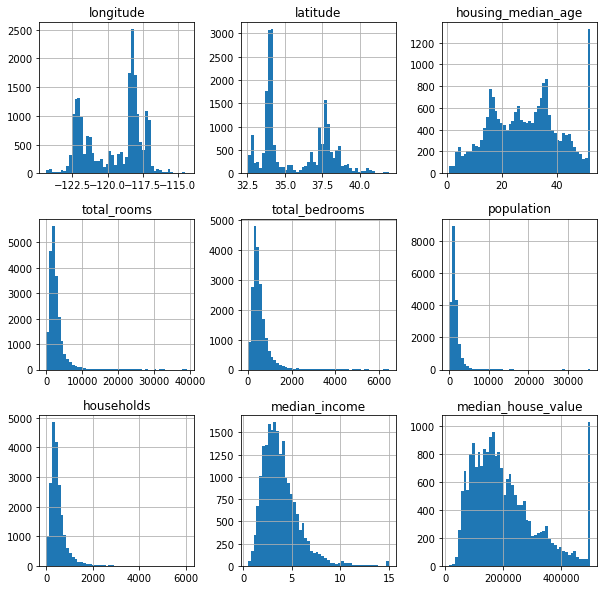

In [ ]:
data.hist(bins=50, figsize=(10, 10))

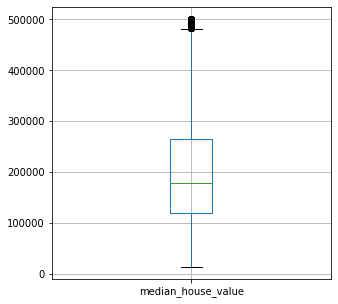

In [ ]:
data.boxplot(['median_house_value'], figsize=(5, 5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


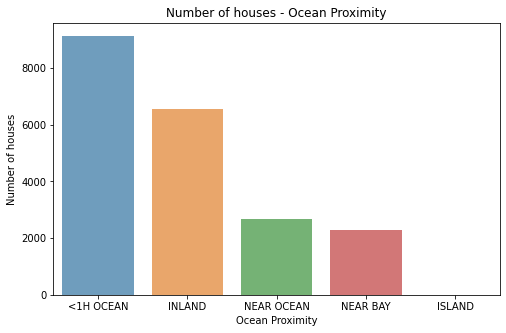

In [ ]:
ocean_prox = data['ocean_proximity'].value_counts() #count values of 'ocean_proximity'
plt.figure(figsize=(8,5))
sns.barplot(ocean_prox.index, ocean_prox.values, alpha=0.7) #put the count on a barplot
plt.title('Number of houses - Ocean Proximity')
plt.ylabel('Number of houses')
plt.xlabel('Ocean Proximity')
plt.show()

Text(0.5, 1.0, 'Population number by area colored according to house values')

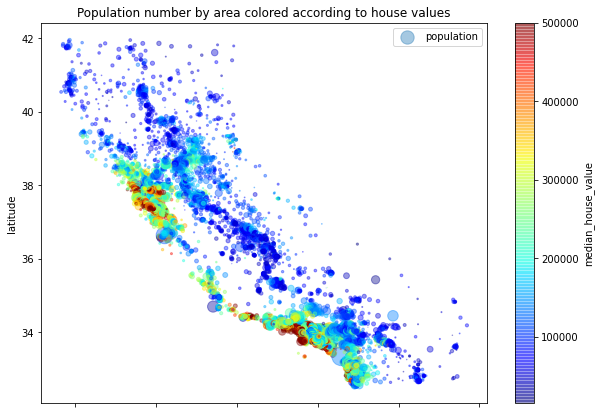

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
    s=data['population']/100, #size of the circle based on population/100
        label='population', figsize=(10,7),
    c='median_house_value', #color of the circle that represent the median value of the houses
        cmap=plt.get_cmap('jet'), colorbar=True)

plt.xticks()
plt.yticks()
plt.title('Population number by area colored according to house values')

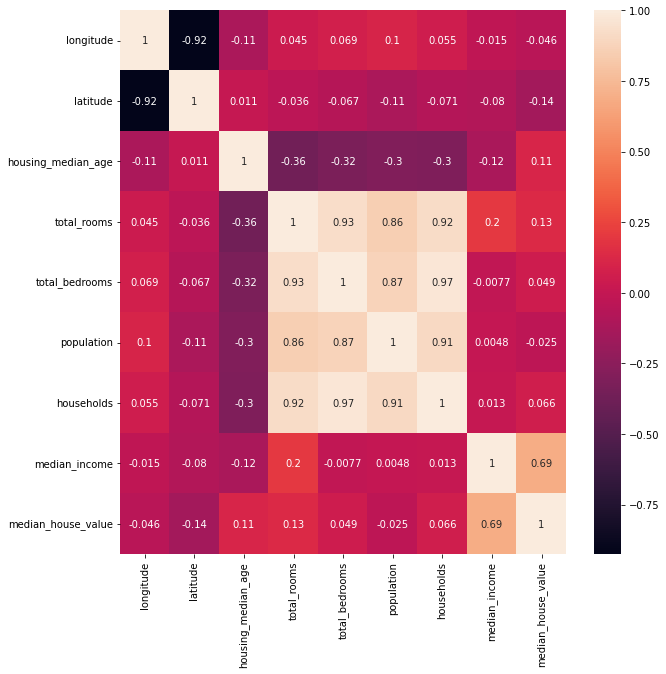

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
data_ocean = pd.get_dummies(data.ocean_proximity) #with the value of the 'ocean_proximity' we create columns
data[data_ocean.columns] = data_ocean #join new columns to dataset
data = data.drop('ocean_proximity', axis=1) #deleting column ocean_proximity
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#separating data
X = data.drop ('median_house_value', axis=1)
y = data.median_house_value

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)
kfold = KFold(n_splits=10, random_state=100, shuffle=True) #cross validation with 10 split


In [ ]:
reg_linear = LinearRegression()
reg_linear.fit(X_train,y_train)
pred_linear = reg_linear.predict(X_test)
linear_score = r2_score(y_test, pred_linear)
linear_mse = mean_squared_error(y_test, pred_linear)
print('Mean Sqaured Error: %.2f' %linear_mse)
print('Score: %.2f' %linear_score)

Mean Sqaured Error: 4633061214.28
Score: 0.65


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fitting and transform training data
X_test = scaler.transform(X_test) #transform test data

In [ ]:
params={'n_neighbors': [11], #[3,4,5,6,7,8,9,10,11,12,13,14,15],
       'weights': ['distance'], #['uniform', 'distance'],
        'p':[1] #manhattan_distance, euclidean_distance
       }


reg_knn = KNeighborsRegressor()
gs = GridSearchCV(estimator=reg_knn, param_grid=params,cv=10, n_jobs=-1) #validate model with his parameters
gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_
print(reg_knn) #printing best estimator values

pred_knn =reg_knn.predict(X_test)

knn_score = r2_score(y_test,pred_knn)
knn_mse = mean_squared_error(y_test, pred_knn)
print('Mean Sqaured Error: %.2f' %knn_mse)
print('Score: %.2f' %knn_score)

KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')
Mean Sqaured Error: 3465499960.10
Score: 0.73


In [ ]:
params= {
    'kernel': ['linear'], #['poly', 'rbf', 'sigmoid'],
    'epsilon': [1.0],
    'C': [100]
        }

reg_svr = SVR()
gs = GridSearchCV(reg_svr,params, cv=5, n_jobs=-1) #validation for Random Forest
gs.fit (X_train, y_train)
reg_svr=gs.best_estimator_
print(reg_svr)

pred_svr = reg_svr.predict (X_test)
svr_score = r2_score(y_test, pred_svr)
svr_mse = mean_squared_error(y_test, pred_svr)
print('Mean Sqaured Error: %.2f' %svr_mse)
print('Score: %.2f' %svr_score)

SVR(C=100, epsilon=1.0, kernel='linear')
Mean Sqaured Error: 5014318816.12
Score: 0.62


In [ ]:
# Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
model_multivariate = LinearRegression()
model_multivariate.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Perform prediction and model score
y_pred = model_multivariate.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print("Model Score for Training data: {}".format(model_multivariate.score(X_train,y_train)))
mv_score = r2_score(y_test,y_pred)
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))
mv_mse = mean_squared_error(y_test,y_pred)
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model Score for Training data: 0.645286068061766
Model Score for Testing data: 0.6450520101550316
Root Mean Squared Error is 68066.59396709496


In [ ]:
data_new = [[linear_score, linear_mse], [knn_score, knn_mse],  [svr_score, svr_mse],[mv_score, mv_mse]]
index = ['Linear Regression', 'KNN Regression', 'SVR Regressor','multivariant regrgession']
pd.DataFrame(data_new, index=index, columns=['R2 score', 'MSE']).sort_values('R2 score',ascending = False)

,R2 score,MSE
KNN Regression,0.734501,3.465500e+09
Linear Regression,0.645052,4.633061e+09
multivariant regrgession,0.645052,4.633061e+09
SVR Regressor,0.615843,5.014319e+09
